In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
sns.color_palette("tab10")
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('shared_data_read_only/Census-Data/ACSST5Y2022.S2201-Column-Metadata.csv',header=1)
df = df.drop(df.index[0])
# df.astype({'GEO_ID': 'int64'}).dtypes
df

,GEO_ID,Geography
1,S2201_C01_001E,Estimate!!Total!!Households
2,S2201_C01_001M,Margin of Error!!Total!!Households
3,S2201_C01_002E,Estimate!!Total!!Households!!With one or more ...
4,S2201_C01_002M,Margin of Error!!Total!!Households!!With one o...
5,S2201_C01_003E,Estimate!!Total!!Households!!No people in the ...
...,...,...
452,S2201_C06_036M,Margin of Error!!Percent households not receiv...
453,S2201_C06_037E,Estimate!!Percent households not receiving foo...
454,S2201_C06_037M,Margin of Error!!Percent households not receiv...
455,S2201_C06_038E,Estimate!!Percent households not receiving foo...


In [8]:
df2 = pd.read_csv('shared_data_read_only/Census-Data/ACSST5Y2022.S2201-Data.csv')
df2 = df2.drop(df2.index[0])
df2

/tmp/ipykernel_16235/296653037.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,70,71,72,73,74,75,76,77,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,222,223,224,225,226,227,228,229,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,374,375,376,377,378,379,380,381) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('shared_data_read_only/Census-Data/ACSS

,GEO_ID,NAME,S2201_C01_001E,S2201_C01_001M,S2201_C01_002E,S2201_C01_002M,S2201_C01_003E,S2201_C01_003M,S2201_C01_004E,S2201_C01_004M,...,S2201_C06_034M,S2201_C06_035E,S2201_C06_035M,S2201_C06_036E,S2201_C06_036M,S2201_C06_037E,S2201_C06_037M,S2201_C06_038E,S2201_C06_038M,Unnamed: 458
1,1400000US01001020100,Census Tract 201; Autauga County; Alabama,700,114,323,74,377,114,444,125,...,(X),(X),(X),19.2,12.5,24.5,10.7,56.3,15.4,NaN
2,1400000US01001020200,Census Tract 202; Autauga County; Alabama,544,101,298,85,246,62,154,41,...,(X),(X),(X),7.2,8.1,38.6,20.3,54.3,18.8,NaN
3,1400000US01001020300,Census Tract 203; Autauga County; Alabama,1305,227,565,166,740,189,569,192,...,(X),(X),(X),10.1,5.7,28.6,12.0,61.2,13.3,NaN
4,1400000US01001020400,Census Tract 204; Autauga County; Alabama,1666,219,948,179,718,165,1048,212,...,(X),(X),(X),27.1,11.1,34.4,11.3,38.5,10.2,NaN
5,1400000US01001020501,Census Tract 205.01; Autauga County; Alabama,1783,304,455,101,1328,283,1074,298,...,(X),(X),(X),11.9,5.7,24.2,13.5,63.9,12.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85392,1400000US72153750501,Census Tract 7505.01; Yauco Municipio; Puerto ...,1661,188,1052,158,609,156,562,126,...,(X),(X),(X),34.2,14.7,29.0,13.5,36.7,13.7,NaN
85393,1400000US72153750502,Census Tract 7505.02; Yauco Municipio; Puerto ...,895,113,394,68,501,113,266,74,...,(X),(X),(X),42.0,13.7,32.0,13.9,26.0,13.6,NaN
85394,1400000US72153750503,Census Tract 7505.03; Yauco Municipio; Puerto ...,685,116,402,85,283,90,227,72,...,(X),(X),(X),34.1,18.7,26.6,14.8,39.3,17.9,NaN
85395,1400000US72153750601,Census Tract 7506.01; Yauco Municipio; Puerto ...,1557,225,776,163,781,164,732,187,...,(X),(X),(X),21.6,9.7,38.8,15.3,39.6,14.9,NaN


In [9]:
df2 = df2.apply(pd.to_numeric,errors="ignore")
df2


/tmp/ipykernel_16235/345991377.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2 = df2.apply(pd.to_numeric,errors="ignore")


,GEO_ID,NAME,S2201_C01_001E,S2201_C01_001M,S2201_C01_002E,S2201_C01_002M,S2201_C01_003E,S2201_C01_003M,S2201_C01_004E,S2201_C01_004M,...,S2201_C06_034M,S2201_C06_035E,S2201_C06_035M,S2201_C06_036E,S2201_C06_036M,S2201_C06_037E,S2201_C06_037M,S2201_C06_038E,S2201_C06_038M,Unnamed: 458
1,1400000US01001020100,Census Tract 201; Autauga County; Alabama,700,114,323,74,377,114,444,125,...,(X),(X),(X),19.2,12.5,24.5,10.7,56.3,15.4,NaN
2,1400000US01001020200,Census Tract 202; Autauga County; Alabama,544,101,298,85,246,62,154,41,...,(X),(X),(X),7.2,8.1,38.6,20.3,54.3,18.8,NaN
3,1400000US01001020300,Census Tract 203; Autauga County; Alabama,1305,227,565,166,740,189,569,192,...,(X),(X),(X),10.1,5.7,28.6,12.0,61.2,13.3,NaN
4,1400000US01001020400,Census Tract 204; Autauga County; Alabama,1666,219,948,179,718,165,1048,212,...,(X),(X),(X),27.1,11.1,34.4,11.3,38.5,10.2,NaN
5,1400000US01001020501,Census Tract 205.01; Autauga County; Alabama,1783,304,455,101,1328,283,1074,298,...,(X),(X),(X),11.9,5.7,24.2,13.5,63.9,12.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85392,1400000US72153750501,Census Tract 7505.01; Yauco Municipio; Puerto ...,1661,188,1052,158,609,156,562,126,...,(X),(X),(X),34.2,14.7,29.0,13.5,36.7,13.7,NaN
85393,1400000US72153750502,Census Tract 7505.02; Yauco Municipio; Puerto ...,895,113,394,68,501,113,266,74,...,(X),(X),(X),42.0,13.7,32.0,13.9,26.0,13.6,NaN
85394,1400000US72153750503,Census Tract 7505.03; Yauco Municipio; Puerto ...,685,116,402,85,283,90,227,72,...,(X),(X),(X),34.1,18.7,26.6,14.8,39.3,17.9,NaN
85395,1400000US72153750601,Census Tract 7506.01; Yauco Municipio; Puerto ...,1557,225,776,163,781,164,732,187,...,(X),(X),(X),21.6,9.7,38.8,15.3,39.6,14.9,NaN


In [12]:
df2= df2[df2['NAME'].str.endswith("Pennsylvania")]
df2

,GEO_ID,NAME,S2201_C01_001E,S2201_C01_001M,S2201_C01_002E,S2201_C01_002M,S2201_C01_003E,S2201_C01_003M,S2201_C01_004E,S2201_C01_004M,...,S2201_C06_034M,S2201_C06_035E,S2201_C06_035M,S2201_C06_036E,S2201_C06_036M,S2201_C06_037E,S2201_C06_037M,S2201_C06_038E,S2201_C06_038M,Unnamed: 458
63419,1400000US42001030101,Census Tract 301.01; Adams County; Pennsylvania,1061,90,451,81,610,99,676,75,...,(X),(X),(X),21.7,6.0,22.5,8.2,55.8,8.6,NaN
63420,1400000US42001030103,Census Tract 301.03; Adams County; Pennsylvania,847,160,399,151,448,134,662,140,...,(X),(X),(X),9.4,7.4,13.5,8.9,77.1,11.4,NaN
63421,1400000US42001030104,Census Tract 301.04; Adams County; Pennsylvania,1285,150,607,172,678,138,840,119,...,(X),(X),(X),24.9,11.1,12.7,7.1,62.4,10.8,NaN
63422,1400000US42001030200,Census Tract 302; Adams County; Pennsylvania,2035,175,905,141,1130,134,1212,165,...,(X),(X),(X),10.1,3.3,29.2,7.2,60.7,7.4,NaN
63423,1400000US42001030300,Census Tract 303; Adams County; Pennsylvania,1668,179,804,122,864,187,935,117,...,(X),(X),(X),10.7,4.9,28.1,8.9,61.3,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,1400000US42133023902,Census Tract 239.02; York County; Pennsylvania,1027,116,561,94,466,79,720,98,...,(X),(X),(X),16.1,5.3,20.6,6.1,63.2,5.7,NaN
66861,1400000US42133023903,Census Tract 239.03; York County; Pennsylvania,1207,113,640,98,567,78,563,80,...,(X),(X),(X),16.3,6.2,23.5,9.3,60.3,9.3,NaN
66862,1400000US42133023904,Census Tract 239.04; York County; Pennsylvania,1671,119,654,191,1017,189,1178,146,...,(X),(X),(X),13.1,6.1,20.7,9.5,66.1,12.6,NaN
66863,1400000US42133024001,Census Tract 240.01; York County; Pennsylvania,2008,175,1074,182,934,196,1186,181,...,(X),(X),(X),13.2,6.2,17.1,6.8,69.8,8.3,NaN


In [13]:
df2.infer_objects().dtypes

GEO_ID             object
NAME               object
S2201_C01_001E      int64
S2201_C01_001M      int64
S2201_C01_002E      int64
                   ...   
S2201_C06_037E     object
S2201_C06_037M     object
S2201_C06_038E     object
S2201_C06_038M     object
Unnamed: 458      float64
Length: 459, dtype: object

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2 = df2.select_dtypes(include=numerics)
df2

,S2201_C01_001E,S2201_C01_001M,S2201_C01_002E,S2201_C01_002M,S2201_C01_003E,S2201_C01_003M,S2201_C01_004E,S2201_C01_004M,S2201_C01_005E,S2201_C01_005M,...,S2201_C05_033M,S2201_C05_035E,S2201_C05_035M,S2201_C05_036E,S2201_C05_036M,S2201_C05_037E,S2201_C05_037M,S2201_C05_038E,S2201_C05_038M,Unnamed: 458
63419,1061,90,451,81,610,99,676,75,62,32,...,104,697,82,151,42,157,61,389,79,NaN
63420,847,160,399,151,448,134,662,140,30,31,...,165,659,148,62,47,89,58,508,156,NaN
63421,1285,150,607,172,678,138,840,119,199,100,...,170,932,132,232,122,118,64,582,119,NaN
63422,2035,175,905,141,1130,134,1212,165,266,77,...,172,1376,162,139,45,402,124,835,122,NaN
63423,1668,179,804,122,864,187,935,117,148,65,...,171,1012,105,108,50,284,98,620,108,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,1027,116,561,94,466,79,720,98,109,38,...,110,775,92,125,44,160,53,490,65,NaN
66861,1207,113,640,98,567,78,563,80,224,68,...,104,695,85,113,48,163,66,419,76,NaN
66862,1671,119,654,191,1017,189,1178,146,185,100,...,154,1326,139,174,77,275,128,877,207,NaN
66863,2008,175,1074,182,934,196,1186,181,409,181,...,164,1465,144,193,88,250,96,1022,191,NaN


In [15]:
selcols = [cl for cl in df2.columns if cl.endswith('M')]

In [18]:
selcols

['S2201_C01_001M',
 'S2201_C01_002M',
 'S2201_C01_003M',
 'S2201_C01_004M',
 'S2201_C01_005M',
 'S2201_C01_006M',
 'S2201_C01_007M',
 'S2201_C01_008M',
 'S2201_C01_009M',
 'S2201_C01_010M',
 'S2201_C01_011M',
 'S2201_C01_012M',
 'S2201_C01_013M',
 'S2201_C01_014M',
 'S2201_C01_015M',
 'S2201_C01_016M',
 'S2201_C01_017M',
 'S2201_C01_018M',
 'S2201_C01_019M',
 'S2201_C01_020M',
 'S2201_C01_021M',
 'S2201_C01_022M',
 'S2201_C01_023M',
 'S2201_C01_024M',
 'S2201_C01_025M',
 'S2201_C01_026M',
 'S2201_C01_027M',
 'S2201_C01_028M',
 'S2201_C01_029M',
 'S2201_C01_030M',
 'S2201_C01_031M',
 'S2201_C01_032M',
 'S2201_C01_033M',
 'S2201_C01_035M',
 'S2201_C01_036M',
 'S2201_C01_037M',
 'S2201_C01_038M',
 'S2201_C03_001M',
 'S2201_C03_002M',
 'S2201_C03_003M',
 'S2201_C03_004M',
 'S2201_C03_005M',
 'S2201_C03_006M',
 'S2201_C03_007M',
 'S2201_C03_008M',
 'S2201_C03_009M',
 'S2201_C03_010M',
 'S2201_C03_011M',
 'S2201_C03_012M',
 'S2201_C03_013M',
 'S2201_C03_014M',
 'S2201_C03_015M',
 'S2201_C03_

In [16]:
ss = [cl for cl in df2.columns if cl not in selcols]
df2 = df2[ss]


In [21]:
df2 = df2.drop(['Unnamed: 458'], axis=1)

In [36]:
cl = [cl for cl in df2.columns if cl not in ["GEO_ID", "NAME"]]
X = df2[cl]
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_

# Add labels to DataFrame
df2['Labels'] = labels
display(df2)

,S2201_C01_001E,S2201_C01_002E,S2201_C01_003E,S2201_C01_004E,S2201_C01_005E,S2201_C01_006E,S2201_C01_007E,S2201_C01_008E,S2201_C01_009E,S2201_C01_010E,...,S2201_C05_029E,S2201_C05_030E,S2201_C05_031E,S2201_C05_032E,S2201_C05_033E,S2201_C05_035E,S2201_C05_036E,S2201_C05_037E,S2201_C05_038E,Labels
63419,1061,451,610,676,62,20,42,323,274,235,...,0,5,10,48,943,697,151,157,389,1
63420,847,399,448,662,30,30,0,155,169,147,...,0,0,0,0,807,659,62,89,508,1
63421,1285,607,678,840,199,51,148,246,344,266,...,0,22,24,44,1118,932,232,118,582,5
63422,2035,905,1130,1212,266,153,113,557,616,478,...,0,81,20,196,1659,1376,139,402,835,2
63423,1668,804,864,935,148,78,70,585,382,302,...,0,25,34,101,1435,1012,108,284,620,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66860,1027,561,466,720,109,40,69,198,289,224,...,0,0,20,14,927,775,125,160,490,1
66861,1207,640,567,563,224,46,178,420,274,136,...,0,4,7,7,1009,695,113,163,419,1
66862,1671,654,1017,1178,185,82,103,308,447,296,...,0,10,42,21,1561,1326,174,275,877,5
66863,2008,1074,934,1186,409,113,296,413,505,383,...,0,11,2,13,1779,1465,193,250,1022,2


In [34]:
df2['Labels']

63419    9
63420    9
63421    9
63422    0
63423    2
        ..
66860    9
66861    9
66862    2
66863    0
66864    2
Name: Labels, Length: 3446, dtype: int32

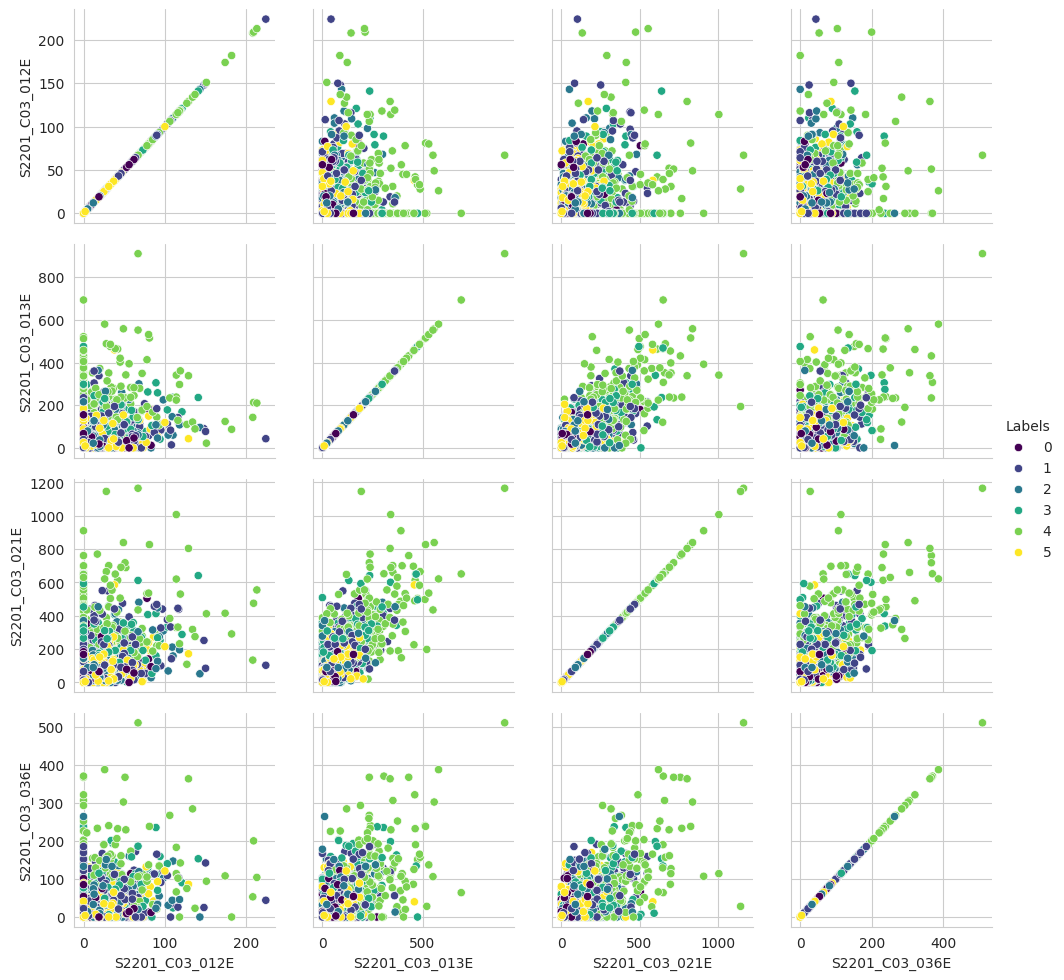

In [37]:
g = sns.PairGrid(df2[["S2201_C03_012E","S2201_C03_013E",
                      "S2201_C03_021E","S2201_C03_036E", 'Labels']], hue='Labels',palette='viridis')
g.map(sns.scatterplot).

g.add_legend()

In [39]:
df2[df2['Labels']==4]

,S2201_C01_001E,S2201_C01_002E,S2201_C01_003E,S2201_C01_004E,S2201_C01_005E,S2201_C01_006E,S2201_C01_007E,S2201_C01_008E,S2201_C01_009E,S2201_C01_010E,...,S2201_C05_029E,S2201_C05_030E,S2201_C05_031E,S2201_C05_032E,S2201_C05_033E,S2201_C05_035E,S2201_C05_036E,S2201_C05_037E,S2201_C05_038E,Labels
63450,1577,538,1039,169,412,26,386,996,203,35,...,0,22,32,27,452,399,23,153,223,4
63485,2050,569,1481,241,277,0,277,1532,244,21,...,0,0,55,7,656,290,47,68,175,4
63533,2003,924,1079,470,542,63,479,991,230,13,...,0,19,45,0,717,767,92,300,375,4
63767,1534,756,778,364,442,82,360,728,381,115,...,0,0,79,12,159,672,84,153,435,4
63768,1791,835,956,532,519,163,356,740,438,128,...,0,0,60,0,642,702,143,144,415,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66292,1894,649,1245,323,484,72,412,1087,350,51,...,0,32,125,195,782,590,117,196,277,4
66348,1572,457,1115,154,470,65,405,948,373,74,...,0,60,113,86,290,209,0,111,98,4
66360,1320,502,818,389,387,29,358,544,422,181,...,0,13,32,0,86,553,105,255,193,4
66361,1269,374,895,306,650,78,572,313,701,134,...,0,4,91,127,111,321,17,161,143,4


## df.loc[:, 'weight'].mean()

In [45]:
print(df2.loc[df2['Labels']==4, 'S2201_C03_012E'].mean())
print(df2.loc[df2['Labels']==0, 'S2201_C03_012E'].mean())
print(df2.loc[df2['Labels']==1, 'S2201_C03_012E'].mean())
print(df2.loc[df2['Labels']==2, 'S2201_C03_012E'].mean())
print(df2.loc[df2['Labels']==3, 'S2201_C03_012E'].mean())

29.103286384976524
7.055147058823529
9.647513812154696
8.80030959752322
9.779569892473118


In [46]:
print(df2.loc[df2['Labels']==4, 'S2201_C03_013E'].mean())
print(df2.loc[df2['Labels']==0, 'S2201_C03_013E'].mean())
print(df2.loc[df2['Labels']==1, 'S2201_C03_013E'].mean())
print(df2.loc[df2['Labels']==2, 'S2201_C03_013E'].mean())
print(df2.loc[df2['Labels']==3, 'S2201_C03_013E'].mean())

216.19718309859155
32.20955882352941
40.06961325966851
37.4984520123839
56.03225806451613


In [47]:
print(df2.loc[df2['Labels']==4, 'S2201_C03_021E'].mean())
print(df2.loc[df2['Labels']==0, 'S2201_C03_021E'].mean())
print(df2.loc[df2['Labels']==1, 'S2201_C03_021E'].mean())
print(df2.loc[df2['Labels']==2, 'S2201_C03_021E'].mean())
print(df2.loc[df2['Labels']==3, 'S2201_C03_021E'].mean())

333.5962441314554
54.875
79.88176795580111
74.25077399380805
95.15770609318996


In [48]:
print(df2.loc[df2['Labels']==4, 'S2201_C03_036E'].mean())

print(df2.loc[df2['Labels']==0, 'S2201_C03_036E'].mean())

print(df2.loc[df2['Labels']==1, 'S2201_C03_036E'].mean())

print(df2.loc[df2['Labels']==2, 'S2201_C03_036E'].mean())

print(df2.loc[df2['Labels']==3, 'S2201_C03_036E'].mean())

97.2300469483568
18.209558823529413
23.54696132596685
23.23374613003096
27.548387096774192
